# SECTION 1 — Φόρτωση και Καθαρισμός Δεδομένων

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Φόρτωση dataset 
df = pd.read_csv(r"C:\Users\panvo\Desktop\homicide-data.csv", sep=';', encoding='latin1')

# Καθαρισμός ονομάτων στηλών για ευκολία χρήσης
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Μετατροπή reported_date σε datetime (μορφή YYYYMMDD)
df['reported_date'] = pd.to_datetime(df['reported_date'], format='%Y%m%d', errors='coerce')

# Μετατροπή ηλικίας σε αριθμητική τιμή
df['victim_age'] = pd.to_numeric(df['victim_age'], errors='coerce')

# Αφαίρεση γραμμών χωρίς ηλικία 
df = df[df['victim_age'].notna()]

# Δημιουργία νέας στήλης με το έτος
df['year'] = df['reported_date'].dt.year

# Προεπισκόπηση δεδομένων
print(df.head())
print(df.info())
print(df.describe(include='all'))

# Έλεγχος κενών τιμών
print("Missing values per column:")
print(df.isnull().sum())

          uid reported_date  victim_last victim_first victim_race  victim_age  \
0  Alb-000001    2010-05-04       GARCIA         JUAN    Hispanic        78.0   
1  Alb-000002    2010-02-16      MONTOYA      CAMERON    Hispanic        17.0   
2  Alb-000003    2010-06-01  SATTERFIELD      VIVIANA       White        15.0   
3  Alb-000004    2010-01-01     MENDIOLA       CARLOS    Hispanic        32.0   
4  Alb-000005    2010-01-02         MULA       VIVIAN       White        72.0   

  victim_sex         city state          lat           lon  \
0       Male  Albuquerque    NM  350957885.0 -1.065386e+09   
1       Male  Albuquerque    NM  350568104.0 -1.067153e+08   
2     Female  Albuquerque    NM   35086092.0 -1.066956e+08   
3       Male  Albuquerque    NM  350784929.0 -1.065561e+09   
4     Female  Albuquerque    NM  351303568.0 -1.065810e+09   

             disposition  year  
0  Closed without arrest  2010  
1       Closed by arrest  2010  
2  Closed without arrest  2010  
3       

# SECTION 2 — Βασική Ανάλυση και Οπτικοποιήσεις

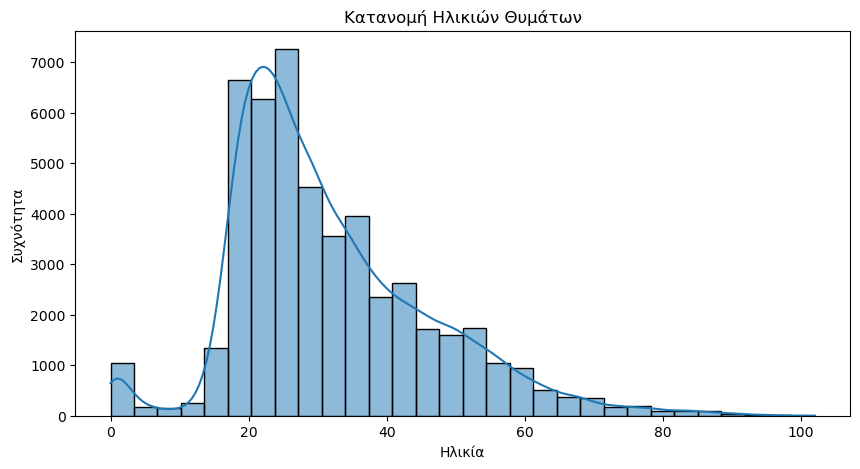

In [64]:
# 1) Κατανομή ηλικιών θυμάτων
plt.figure(figsize=(10,5))
sns.histplot(df['victim_age'], bins=30, kde=True)
plt.title("Κατανομή Ηλικιών Θυμάτων")
plt.xlabel("Ηλικία")
plt.ylabel("Συχνότητα")
plt.show()


Η κατανομή ηλικιών δείχνει ποιες ηλικιακές ομάδες εμφανίζονται συχνότερα ως θύματα ανθρωποκτονιών.

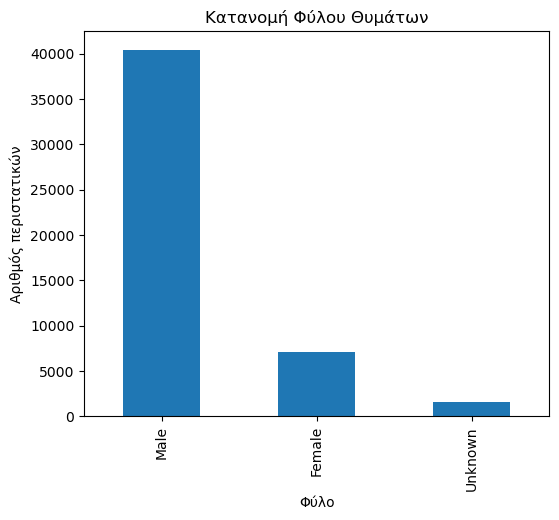

In [69]:
# 2) Κατανομή φύλου θυμάτων
plt.figure(figsize=(6,5))
df['victim_sex'].value_counts().plot(kind='bar')
plt.title("Κατανομή Φύλου Θυμάτων")
plt.xlabel("Φύλο")
plt.ylabel("Αριθμός περιστατικών")
plt.show()



Το γράφημα δείχνει πόσα θύματα είναι άντρες ή γυναίκες, βοηθώντας μας να δούμε τη δημογραφική κατανομή..Τα δεδομένα δείχνουν πως οι άντρες αποτελούν μεγαλύτερο ποσοστό θυμάτων ανθρωποκτονιών.

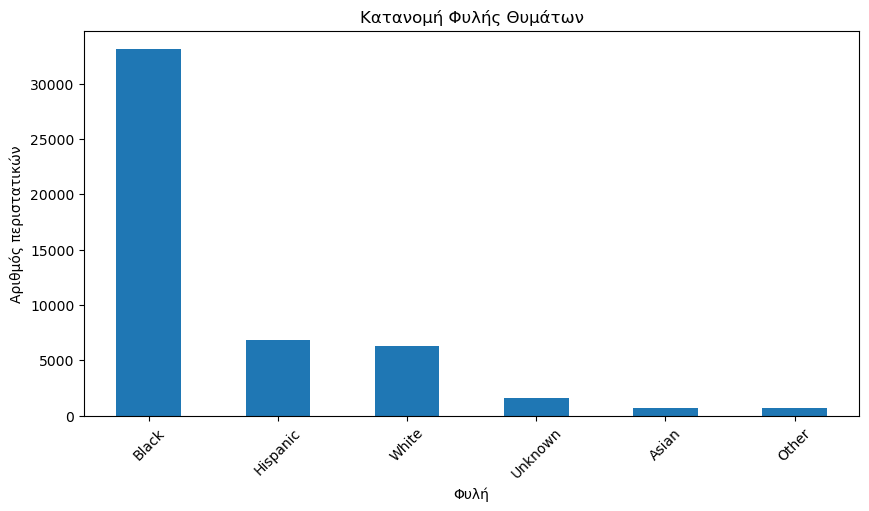

In [72]:
# 3) Κατανομή φυλής θυμάτων
plt.figure(figsize=(10,5))
df['victim_race'].value_counts().plot(kind='bar')
plt.title("Κατανομή Φυλής Θυμάτων")
plt.xlabel("Φυλή")
plt.ylabel("Αριθμός περιστατικών")
plt.xticks(rotation=45)
plt.show()



Η κατανομή ανά φυλή δείχνει ποιες ομάδες εμφανίζονται συχνότερα ως θύματα ανθρωποκτονίας. Αυτό βοηθά στον εντοπισμό πιθανών κοινωνικών ή δημογραφικών παραγόντων που σχετίζονται με την αυξημένη έκθεση σε βίαια εγκλήματα.


# SECTION 3 — Ανάλυση Εξέλιξης στο Χρόνο

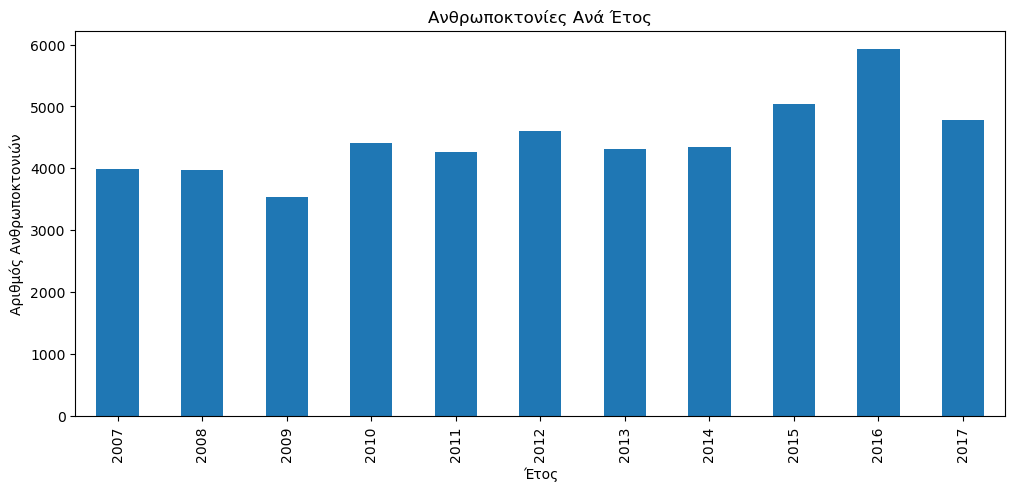

In [145]:
# Συνολικά περιστατικά ανά έτος
df['year'].value_counts().sort_index().plot(kind='bar', figsize=(12,5))
plt.title("Ανθρωποκτονίες Ανά Έτος")
plt.xlabel("Έτος")
plt.ylabel("Αριθμός Ανθρωποκτονιών")
plt.show()


Το γράφημα δείχνει την εξέλιξη των ανθρωποκτονιών ανά έτος, βοηθώντας στον εντοπισμό αυξήσεων ή μειώσεων με τα χρόνια.


# SECTION 4 — Ανάλυση Επίλυσης Υποθέσεων (Clearance Rates)

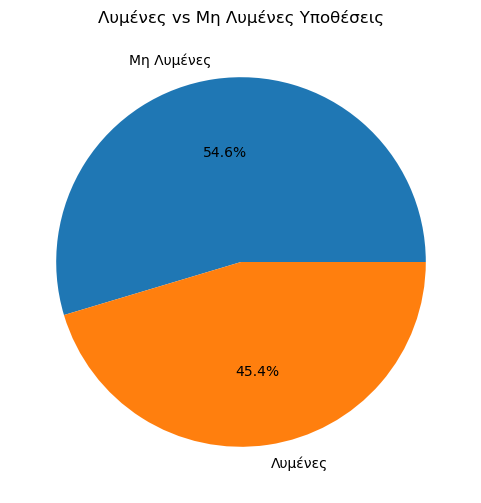

In [79]:
# Δημιουργία στήλης "is_solved" (True = λυμένη υπόθεση)
df['is_solved'] = df['disposition'].isin(['Closed by arrest', 'Closed without arrest'])

# Ποσοστό λυμένων vs μη λυμένων
plt.figure(figsize=(6,6))
df['is_solved'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=['Μη Λυμένες', 'Λυμένες'], ylabel="")
plt.title("Λυμένες vs Μη Λυμένες Υποθέσεις")
plt.show()


 Το διάγραμμα δείχνει το ποσοστό των υποθέσεων που έχουν επιλυθεί σε σχέση με αυτές που παραμένουν ανοιχτές.

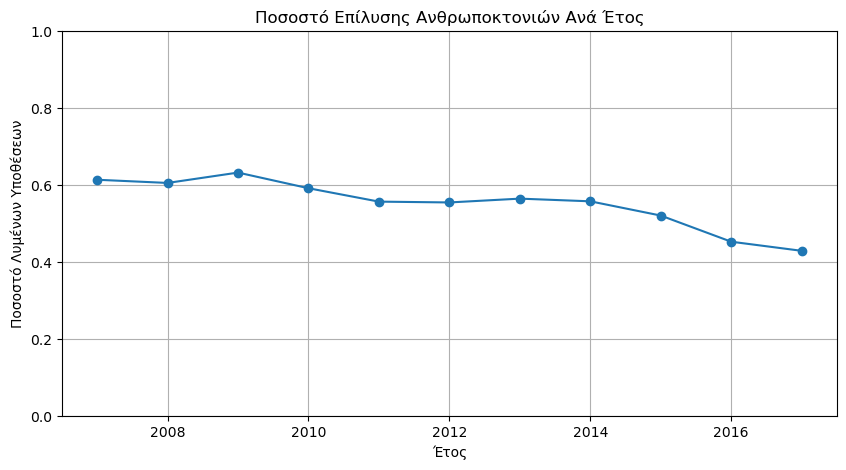

In [84]:
# 1) Clearance Rate ανά έτος

yearly_clearance = df.groupby('year')['is_solved'].mean()

plt.figure(figsize=(10,5))
yearly_clearance.plot(marker='o')
plt.title("Ποσοστό Επίλυσης Ανθρωποκτονιών Ανά Έτος")
plt.xlabel("Έτος")
plt.ylabel("Ποσοστό Λυμένων Υποθέσεων")
plt.ylim(0, 1)
plt.grid(True)
plt.show()


 Η γραμμή παρουσιάζει πόσες υποθέσεις λύνονται ανά έτος και αν η αποτελεσματικότητα αλλάζει με το χρόνο.

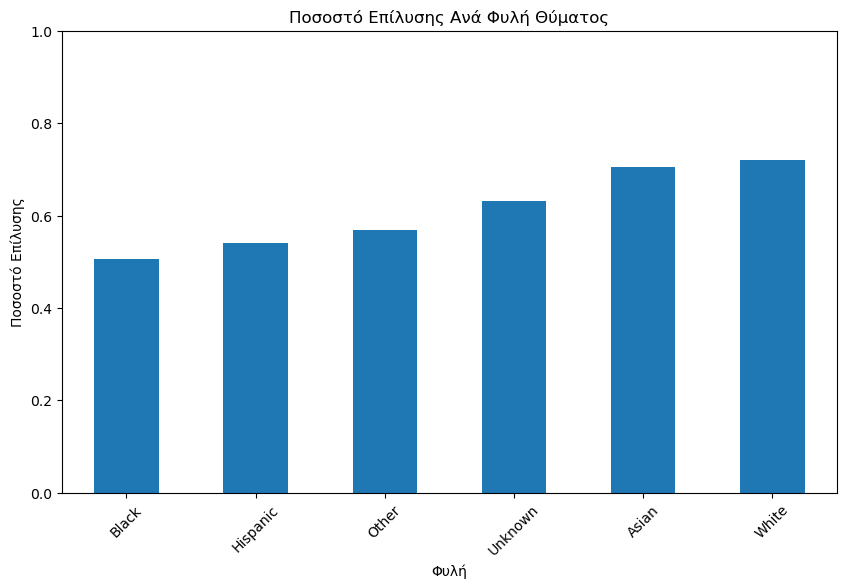

In [87]:
# 2) Clearance rate ανά φυλή θύματος

race_clearance = df.groupby('victim_race')['is_solved'].mean().sort_values()

plt.figure(figsize=(10,6))
race_clearance.plot(kind='bar')
plt.title("Ποσοστό Επίλυσης Ανά Φυλή Θύματος")
plt.xlabel("Φυλή")
plt.ylabel("Ποσοστό Επίλυσης")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()



 Το γράφημα μας επιτρέπει να δούμε αν υπάρχουν διαφορές στο ποσοστό επίλυσης ανά φυλή του θύματος.

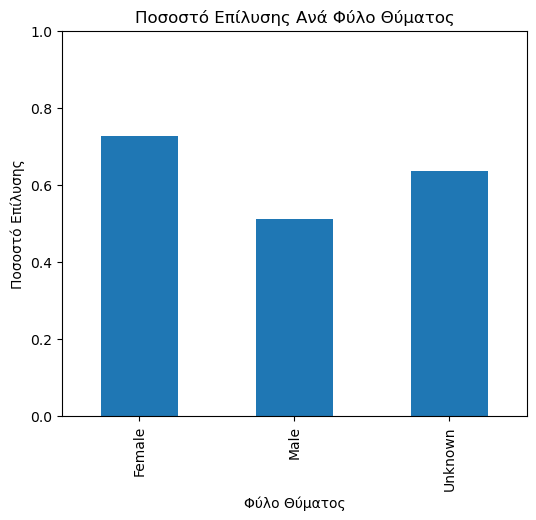

In [90]:
# 3) Clearance rate ανά φύλο θύματος

sex_clearance = df.groupby('victim_sex')['is_solved'].mean()

plt.figure(figsize=(6,5))
sex_clearance.plot(kind='bar')
plt.title("Ποσοστό Επίλυσης Ανά Φύλο Θύματος")
plt.xlabel("Φύλο Θύματος")
plt.ylabel("Ποσοστό Επίλυσης")
plt.ylim(0, 1)
plt.show()

Το γράφημα δείχνει αν το φύλο του θύματος επηρεάζει την πιθανότητα επίλυσης της υπόθεσης.

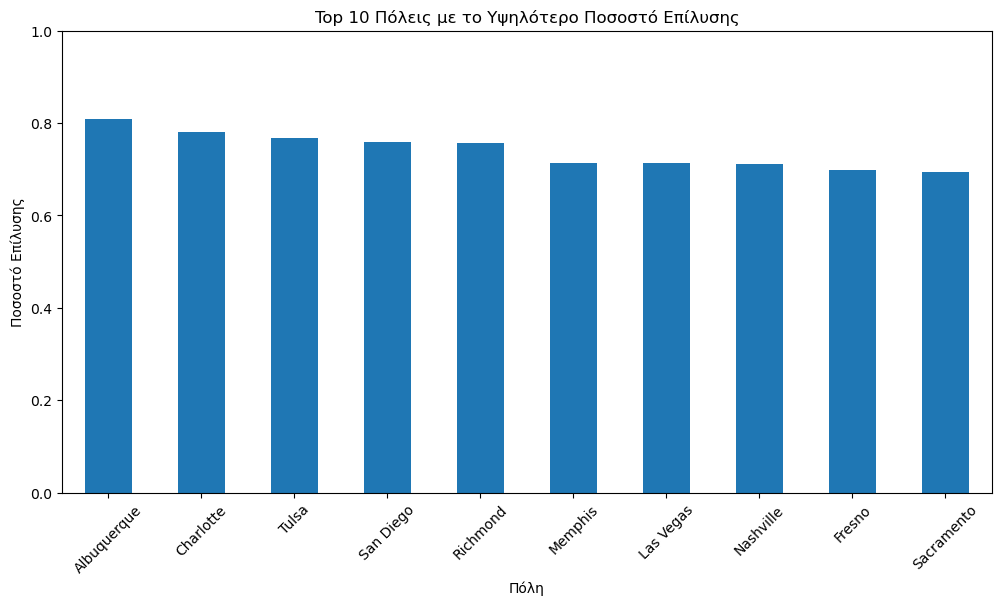

In [97]:
# 4) Clearance rate ανά πόλη (Top 10)

city_clearance = df.groupby('city')['is_solved'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
city_clearance.plot(kind='bar')
plt.title("Top 10 Πόλεις με το Υψηλότερο Ποσοστό Επίλυσης")
plt.xlabel("Πόλη")
plt.ylabel("Ποσοστό Επίλυσης")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()



Το διάγραμμα παρουσιάζει τις πόλεις με τη μεγαλύτερη αποτελεσματικότητα επίλυσης ανθρωποκτονιών.


In [104]:
!pip install folium

In [108]:
df['state'].unique()


array(['NM', 'GA', 'MD', 'LA', 'AL', 'MA', 'NY', 'NC', 'IL', 'OH', 'CO',
       'MI', 'TX', 'CA', 'IN', 'FL', 'MO', 'NV', 'KY', 'TN', 'wI', 'MN',
       'OK', 'NE', 'PA', 'VA', 'DC'], dtype=object)

In [110]:
# Λεξικό αντιστοίχισης από συντομογραφία σε πλήρες όνομα πολιτείας
us_states = {
    'AL':'Alabama','AK':'Alaska','AZ':'Arizona','AR':'Arkansas','CA':'California',
    'CO':'Colorado','CT':'Connecticut','DE':'Delaware','FL':'Florida','GA':'Georgia',
    'HI':'Hawaii','ID':'Idaho','IL':'Illinois','IN':'Indiana','IA':'Iowa','KS':'Kansas',
    'KY':'Kentucky','LA':'Louisiana','ME':'Maine','MD':'Maryland','MA':'Massachusetts',
    'MI':'Michigan','MN':'Minnesota','MS':'Mississippi','MO':'Missouri','MT':'Montana',
    'NE':'Nebraska','NV':'Nevada','NH':'New Hampshire','NJ':'New Jersey','NM':'New Mexico',
    'NY':'New York','NC':'North Carolina','ND':'North Dakota','OH':'Ohio','OK':'Oklahoma',
    'OR':'Oregon','PA':'Pennsylvania','RI':'Rhode Island','SC':'South Carolina',
    'SD':'South Dakota','TN':'Tennessee','TX':'Texas','UT':'Utah','VT':'Vermont',
    'VA':'Virginia','WA':'Washington','WV':'West Virginia','WI':'Wisconsin','WY':'Wyoming',
    'DC':'District of Columbia'
}

# Κάνουμε πρώτα όλα τα state uppercase για ασφάλεια 
df['state'] = df['state'].str.upper()

# Δημιουργούμε νέα στήλη με το πλήρες όνομα πολιτείας
df['state_full'] = df['state'].map(us_states)

# Έλεγχος
print(df[['state', 'state_full']].drop_duplicates())


      state            state_full
0        NM            New Mexico
378      GA               Georgia
1351     MD              Maryland
4178     LA             Louisiana
4602     AL               Alabama
5402     MA         Massachusetts
6016     NY              New York
6537     NC        North Carolina
7224     IL              Illinois
12759    OH                  Ohio
16104    CO              Colorado
16416    MI              Michigan
19211    TX                 Texas
19761    CA            California
23189    IN               Indiana
24511    FL               Florida
25679    MO              Missouri
26869    NV                Nevada
30885    KY              Kentucky
31461    TN             Tennessee
33719    WI             Wisconsin
34834    MN             Minnesota
38975    OK              Oklahoma
39647    NE              Nebraska
40056    PA          Pennsylvania
44638    VA              Virginia
50834    DC  District of Columbia


# SECTION 4 -- Χάρτης Ανθρωποκτονιών Ανά Πολιτεία (Choropleth)

In [112]:
import folium

# Υπολογισμός αριθμού ανθρωποκτονιών ανά πλήρες όνομα πολιτείας
state_counts = df['state_full'].value_counts().reset_index()
state_counts.columns = ['state_full', 'homicides']

# Δημιουργία βασικού χάρτη πάνω από τις ΗΠΑ
m = folium.Map(location=[37.8, -96], zoom_start=4)

# GeoJSON με τα όρια των πολιτειών των ΗΠΑ
us_states_geojson_url = "https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json"

# Δημιουργία choropleth χάρτη
folium.Choropleth(
    geo_data=us_states_geojson_url,           # γεωμετρία πολιτειών
    name='choropleth',
    data=state_counts,                        # δεδομένα (state_full, homicides)
    columns=['state_full', 'homicides'],      # στήλες από το dataframe
    key_on='feature.properties.name',         # πεδίο "name" στο GeoJSON
    fill_color='YlOrRd',                      # χρωματική παλέτα
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Αριθμός Ανθρωποκτονιών ανά Πολιτεία'
).add_to(m)

m


Ο χάρτης δείχνει τον αριθμό ανθρωποκτονιών ανά πολιτεία. Οι πιο σκούρες αποχρώσεις αντιστοιχούν σε πολιτείες με περισσότερα περιστατικά.

In [134]:
set(geo_states) - set(df['state_full'].unique())


{'Alaska',
 'Arizona',
 'Arkansas',
 'Connecticut',
 'Delaware',
 'Hawaii',
 'Idaho',
 'Iowa',
 'Kansas',
 'Maine',
 'Mississippi',
 'Montana',
 'New Hampshire',
 'New Jersey',
 'North Dakota',
 'Oregon',
 'Puerto Rico',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Utah',
 'Vermont',
 'Washington',
 'West Virginia',
 'Wyoming'}

Ορισμένες πολιτείες εμφανίζονται με μαύρο χρώμα επειδή δεν υπάρχουν καταγεγραμμένες ανθρωποκτονίες για αυτές στο dataset. Το homicide dataset δεν καλύπτει το σύνολο των πολιτειών των ΗΠΑ, αλλά επιλεγμένες περιοχές για τις οποίες υπήρχαν διαθέσιμα δεδομένα από τα αστυνομικά τμήματα.

# Χάρτης Ποσοστού Επίλυσης Ανθρωποκτονιών Ανά Πολιτεία

In [141]:
# Υπολογίζουμε το ποσοστό επίλυσης (μέσος όρος is_solved) ανά πολιτεία
state_clearance = df.groupby('state_full')['is_solved'].mean().reset_index()

# Το μετατρέπουμε σε ποσοστό (%)
state_clearance['clearance_rate'] = state_clearance['is_solved'] * 100

# Δημιουργία βάσης χάρτη
m_clearance = folium.Map(location=[37.8, -96], zoom_start=4)

# GeoJSON με τα όρια των πολιτειών των ΗΠΑ
us_states_geojson_url = "https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json"

# Δημιουργία choropleth χάρτη με ποσοστό επίλυσης
folium.Choropleth(
    geo_data=us_states_geojson_url,
    name='choropleth',
    data=state_clearance,
    columns=['state_full', 'clearance_rate'],      # πολιτεία + ποσοστό επίλυσης
    key_on='feature.properties.name',
    fill_color='YlGnBu',                           # παλέτα χρωμάτων
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Ποσοστό Επίλυσης Ανθρωποκτονιών (%)'
).add_to(m_clearance)

m_clearance

Ο χάρτης απεικονίζει το ποσοστό επίλυσης ανθρωποκτονιών για κάθε πολιτεία. Οι πιο σκούρες αποχρώσεις αντιστοιχούν σε υψηλότερα ποσοστά επίλυσης, επιτρέποντας τη σύγκριση της αποτελεσματικότητας των αρχών μεταξύ διαφορετικών περιοχών.